<h1>Multi-label Land Cover Classification with Deep Learning</h1>


The redesigned Multi-label UC Merced dataset with 18 land cover classes is used. UC Merced Landuse dataset was originally introduced as one of the earliest satellite datasets for computer vision. In fact, the UC Merced dataset is considered the MNIST of satellite image dataset. The original dataset consisted of 21 classes of single-label classification.

Inspired by https://github.com/shakasom

<h3>Getting Data</h3>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from fastai import *
from fastai.vision.all import *

Download and unzip https://www.dropbox.com/s/u83ae1efaah2w9o/UCMercedLanduse.zip.
Transform txt to csv with reformatting fields in Excel.

In [3]:
df = pd.read_csv(r"D:\python_projects\Multi-label Cover\UCMerced\multilabels.csv", sep="\t")
df.head()

,IMAGE,labels,is_valid
0,agricultural00.tif,field trees,True
1,agricultural01.tif,field,True
2,agricultural02.tif,field,True
3,agricultural03.tif,field,True
4,agricultural04.tif,trees,True


<h3>Training</h3>

In [4]:
path = Path (r"D:\python_projects\Multi-label Cover\UCMerced\images")
files =get_image_files(path)
len(files)

2100

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


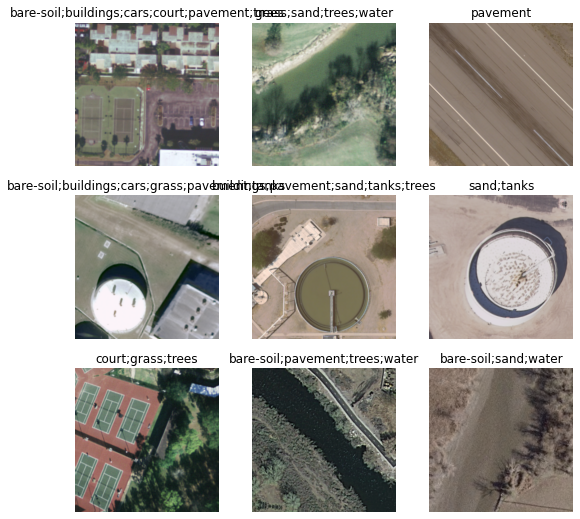

In [5]:
dls = ImageDataLoaders.from_df(df, path, valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(256), batch_tfms=aug_transforms(size=256))
dls.show_batch()

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0012022644514217973)

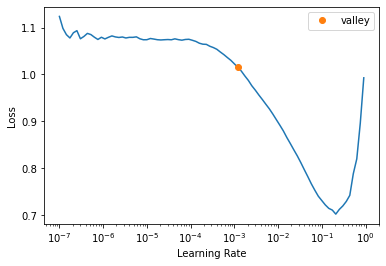

In [7]:
learn.lr_find()
# Finetuning occasionally doesn't work: learn.fine_tune(2, 3e-3)

<h3>Prediction</h3>

Download and unzip https://www.dropbox.com/s/6tt0t61uq2w1n3s/test.zip

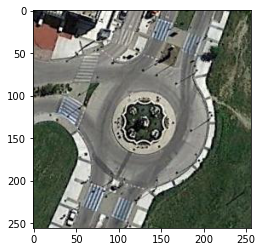

In [8]:
img = mpimg.imread(r"D:\python_projects\Multi-label Cover\UCMerced\test\roundabout_086.jpg")
imgplot = plt.imshow(img)
plt.show()

In [9]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

(#10) ['bare-soil','buildings','chaparral','court','field','grass','pavement','ship','trees','water']

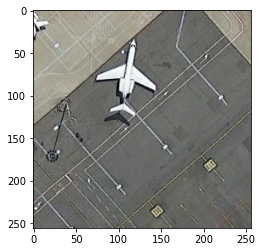

In [10]:
img = mpimg.imread(r"D:\python_projects\Multi-label Cover\UCMerced\test\airplane_439.jpg")
imgplot = plt.imshow(img)
plt.show()

In [11]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

(#11) ['bare-soil','buildings','cars','chaparral','court','field','grass','pavement','ship','trees'...]

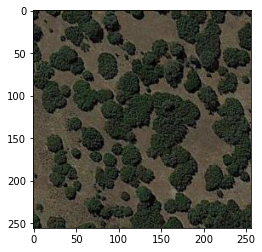

In [12]:
img = mpimg.imread(r"D:\python_projects\Multi-label Cover\UCMerced\test\chaparral_121.jpg")
imgplot = plt.imshow(img)
plt.show()

In [13]:
learn.predict(img)
pred_class

(#11) ['bare-soil','buildings','cars','chaparral','court','field','grass','pavement','ship','trees'...]